In [51]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.15.0


In [52]:
import keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 2.15.0


In [53]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


In [54]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [55]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(64, (5, 5), input_shape = (64, 64, 3), activation = 'relu'))

In [56]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))


In [57]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

In [58]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

In [59]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [60]:
# Passo 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [61]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Pre processamento 

In [62]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_personagens/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_personagens/test_set',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


In [107]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit(
    training_set,
    steps_per_epoch= 196 // 32,
    epochs=20,
    validation_data=validation_set,
    validation_steps= 73 // 32
)


Epoch 1/20
6/6 [==============================] - 1s 125ms/step - loss: 0.4954 - accuracy: 0.7805 - val_loss: 0.5038 - val_accuracy: 0.8281
Epoch 2/20
6/6 [==============================] - 1s 115ms/step - loss: 0.4866 - accuracy: 0.7927 - val_loss: 0.4941 - val_accuracy: 0.8125
Epoch 3/20
6/6 [==============================] - 1s 108ms/step - loss: 0.5024 - accuracy: 0.7378 - val_loss: 0.5190 - val_accuracy: 0.7500
Epoch 4/20
6/6 [==============================] - 1s 111ms/step - loss: 0.4632 - accuracy: 0.7805 - val_loss: 0.4848 - val_accuracy: 0.8281
Epoch 5/20
6/6 [==============================] - 1s 107ms/step - loss: 0.4574 - accuracy: 0.7927 - val_loss: 0.4232 - val_accuracy: 0.8750
Epoch 6/20
6/6 [==============================] - 1s 105ms/step - loss: 0.4190 - accuracy: 0.7988 - val_loss: 0.3900 - val_accuracy: 0.8594
Epoch 7/20
6/6 [==============================] - 1s 104ms/step - loss: 0.3891 - accuracy: 0.8354 - val_loss: 0.3708 - val_accuracy: 0.8438
Epoch 8/20
6/6 [====

# Fazendo previsões

In [99]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Função para testar a imagem
def testPrediction(imgFile):
    test_image = image.load_img(imgFile, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices

    if result[0][0] == 1:
        prediction = 'Homer'
    else:
        prediction = 'Bart'

    print(prediction)



    # Carregando a imagem 
    img = mpimg.imread(imgFile)
    plt.imshow(img)
    plt.show()


## Teste imagem 1

1/1 [==============================] - 0s 23ms/step
Bart


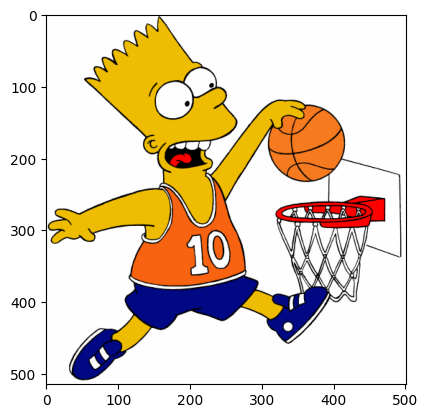

In [108]:
testPrediction('dataset_personagens/test_set/bart/bart2.bmp')


## Teste imagem 2

1/1 [==============================] - 0s 24ms/step
Homer


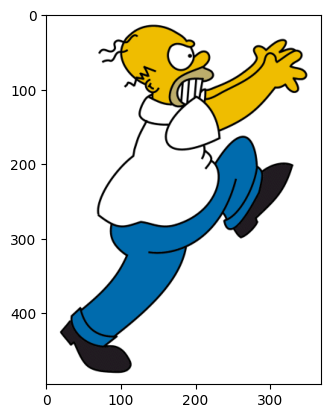

In [109]:
testPrediction('dataset_personagens/test_set/homer/homer24.bmp')

## Teste imagem 3

1/1 [==============================] - 0s 18ms/step
Homer


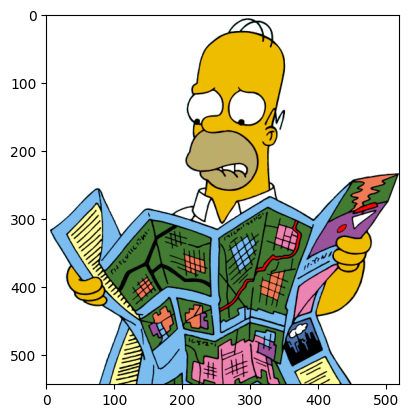

In [110]:
testPrediction('dataset_personagens/test_set/homer/homer26.bmp')